Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [4]:
%cd /content/gdrive/MyDrive/Colab Notebooks/


/content/gdrive/MyDrive/Colab Notebooks


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("CNN_assignment_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('CNN_assignment_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [6]:
pwd

'/content/gdrive/MyDrive/Colab Notebooks'

In [7]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2241
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [9]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2241 files belonging to 9 classes.
Using 1793 files for training.


In [10]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2241 files belonging to 9 classes.
Using 448 files for validation.


In [11]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [12]:
print(type(train_ds))
print(train_ds)

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>


In [13]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

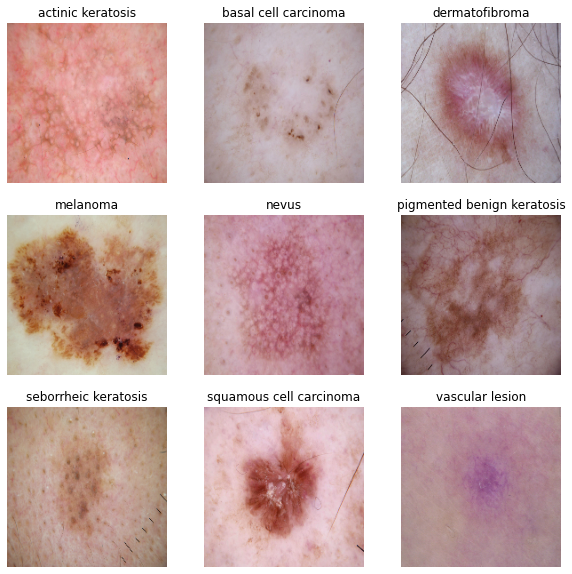

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
i=0
for k in class_names:
  for images, labels in train_ds.unbatch().take(1793):
    if class_names[labels] == k:
      i=i+1
      ax = plt.subplot(3, 3, i)
      plt.imshow(images.numpy().astype("uint8"))
      plt.title(class_names[labels])
      plt.axis("off")
      break    

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
num_classes = 9

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_width,img_height,3)),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 118336)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 816s 4s/step - loss: 2.7801 - accuracy: 0.2203 - val_loss: 1.7658 - val_accuracy: 0.3795
Epoch 2/20
57/57 [==============================] - 1s 20ms/step - loss: 1.6856 - accuracy: 0.4159 - val_loss: 1.5151 - val_accuracy: 0.4888
Epoch 3/20
57/57 [==============================] - 1s 19ms/step - loss: 1.4491 - accuracy: 0.4770 - val_loss: 1.4627 - val_accuracy: 0.4732
Epoch 4/20
57/57 [==============================] - 1s 19ms/step - loss: 1.2660 - accuracy: 0.5549 - val_loss: 1.4062 - val_accuracy: 0.5223
Epoch 5/20
57/57 [==============================] - 1s 19ms/step - loss: 1.0627 - accuracy: 0.6164 - val_loss: 1.5713 - val_accuracy: 0.4888
Epoch 6/20
57/57 [==============================] - 1s 19ms/step - loss: 0.8704 - accuracy: 0.6964 - val_loss: 1.7148 - val_accuracy: 0.4888
Epoch 7/20
57/57 [==============================] - 1s 19ms/step - loss: 0.8443 - accuracy: 0.7076 - val_loss: 1.6571 - val_accuracy: 0.5179
Epoch 8/20
57

### Visualizing training results

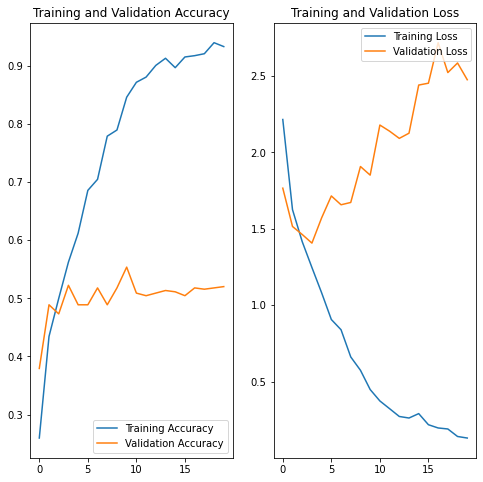

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

 **Model is overfitting since training accuracy is 93% while validation accuracy is 52%**

#### Apply Data Augmentation

In [ ]:
# Using data augmentation

#from tensorflow.keras.preprocessing.image import ImageDataGenerator

#image_size = 180
#batch_size = 32

## Apply shear, zoom, horizontal flip of original images
#train_data_gen = ImageDataGenerator(shear_range=0.2, zoom_range=0.2, 
#                                    horizontal_flip=True)

## retrieving original training set
#list_images = []
#list_labels = []
#for images, labels in train_ds.unbatch().take(-1):  
#    list_images.append(images.numpy())
#    list_labels.append(labels.numpy())

#list_images = np.array(list_images)
#list_labels = np.array(list_labels)

# create augmented tensorflow data object
#train_generator = train_data_gen.flow(list_images, list_labels,batch_size=batch_size)

In [ ]:
## Method 2 - read from directory

#from tensorflow.keras.preprocessing.image import ImageDataGenerator

#image_size = 180
#batch_size = 32

#train_data_gen = ImageDataGenerator(
#                                    shear_range=0.2, zoom_range=0.2, 
#                                    horizontal_flip=True, validation_split=0.2)

#train_generator = train_data_gen.flow_from_directory(data_dir_train, (180,180),batch_size=batch_size, seed=123, subset='training',  class_mode='categorical')

#image_batch, label_batch = next(iter(train_generator))

#plt.figure(figsize=(10, 10))
#for i in range(9):
#  ax = plt.subplot(3, 3, i + 1)
#  plt.imshow(image_batch[i])
#  label = label_batch[i] 
#  plt.axis("off")

In [16]:
IMG_SIZE = 180

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(IMG_SIZE, 
                                                              IMG_SIZE,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),      
  ]
)

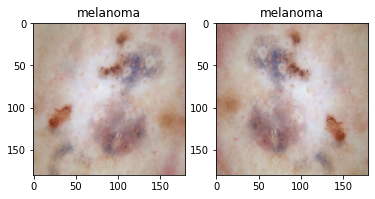

In [18]:
for images, labels in train_ds.take(1):
  result = data_augmentation(images)
  aug_image_batch = next(iter(result))
  image_batch = next(iter(images))
  ax = plt.subplot(1, 2, 1)
  plt.imshow(aug_image_batch.numpy().astype("uint8"))
  plt.title(class_names[labels[0]])
  ax = plt.subplot(1, 2, 2)
  plt.imshow(image_batch.numpy().astype("uint8"))
  plt.title(class_names[labels[0]])

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
#image_batch, label_batch = next(iter(train_generator))

#plt.figure(figsize=(10, 10))
#for i in range(9):
#  ax = plt.subplot(3, 3, i + 1)
#  plt.imshow(image_batch[i].astype("uint8"))
#  label = label_batch[i]
#  plt.title(class_names[label])
#  plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [22]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

### Your code goes here
num_classes = 9

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_width,img_height,3)),
  data_augmentation,
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.1),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])


### Compiling the model

In [23]:
### Todo, choose an appropirate optimiser and loss function
### Todo, choose an appropirate optimiser and loss function
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

### Training the model

In [24]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 3s 37ms/step - loss: 5.2300 - accuracy: 0.1680 - val_loss: 2.0333 - val_accuracy: 0.2500
Epoch 2/20
57/57 [==============================] - 2s 35ms/step - loss: 1.8932 - accuracy: 0.3026 - val_loss: 1.9226 - val_accuracy: 0.3326
Epoch 3/20
57/57 [==============================] - 2s 35ms/step - loss: 1.8177 - accuracy: 0.3288 - val_loss: 1.6661 - val_accuracy: 0.4308
Epoch 4/20
57/57 [==============================] - 2s 35ms/step - loss: 1.5801 - accuracy: 0.4504 - val_loss: 1.6724 - val_accuracy: 0.4643
Epoch 5/20
57/57 [==============================] - 2s 35ms/step - loss: 1.4511 - accuracy: 0.5130 - val_loss: 1.5439 - val_accuracy: 0.4978
Epoch 6/20
57/57 [==============================] - 2s 35ms/step - loss: 1.3825 - accuracy: 0.5008 - val_loss: 1.4440 - val_accuracy: 0.5134
Epoch 7/20
57/57 [==============================] - 2s 35ms/step - loss: 1.3218 - accuracy: 0.5316 - val_loss: 1.4116 - val_accuracy: 0.5268
Epoch 8/20
57

### Visualizing the results

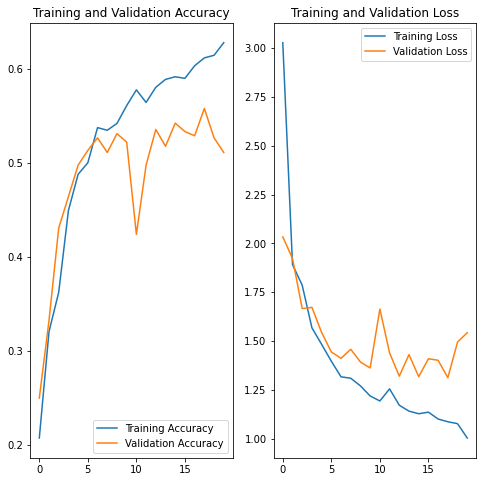

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**After data agumentation(train acc:70% val:56%) and dropouts, model became more general. Gap between train and val accuracy reduced a lot just by applying transformations to training images. Train accuracy 65% val accuracy = 55%. Still need to improve accuracy.**

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

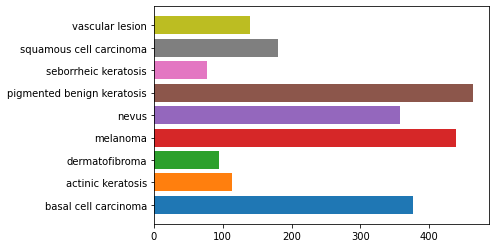

In [44]:
import os
path = 'CNN_assignment_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
mn = 0
folders = ([name for name in os.listdir(path)
            if os.path.isdir(os.path.join(path, name))]) # get all directories 
for folder in folders:
    contents = os.listdir(os.path.join(path,folder)) # get list of contents
    if len(contents) >= mn: # if greater than the limit, print folder and number of contents
        plt.barh(folder,len(contents))


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


**Pigmented benign keratosis, melanoma, basal cell carcnoma dominates proportionate number of samples.  Seborrheic keratosis has least number of samples**

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [45]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [47]:
path_to_training_dataset="CNN_assignment_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7EFFB5C84E48>:   0%|          | 1/500 [00:00<00:53,  9.31 Samples/s]

Initialised with 114 image(s) found.
Output directory set to CNN_assignment_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7EFFB1EC7D68>: 100%|██████████| 500/500 [00:17<00:00, 28.21 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EFFB5B57E10>:   0%|          | 2/500 [00:00<00:29, 16.95 Samples/s]

Initialised with 376 image(s) found.
Output directory set to CNN_assignment_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7EFFB1EDBDD8>: 100%|██████████| 500/500 [00:17<00:00, 28.13 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7EFFB1EC79B0>:   0%|          | 1/500 [00:00<01:08,  7.27 Samples/s]

Initialised with 95 image(s) found.
Output directory set to CNN_assignment_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7EFFB5B5D4E0>: 100%|██████████| 500/500 [00:18<00:00, 27.28 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 439 image(s) found.
Output directory set to CNN_assignment_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7EFFB1E7EC50>: 100%|██████████| 500/500 [01:27<00:00,  5.73 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to CNN_assignment_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7EFFB1EBA048>: 100%|██████████| 500/500 [01:12<00:00,  6.88 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 463 image(s) found.
Output directory set to CNN_assignment_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EFFB1EA6BE0>: 100%|██████████| 500/500 [00:18<00:00, 26.75 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to CNN_assignment_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7EFFB1EDE320>: 100%|██████████| 500/500 [00:39<00:00, 12.63 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to CNN_assignment_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EFFB1E8A160>: 100%|██████████| 500/500 [00:18<00:00, 27.10 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to CNN_assignment_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EFFB1EC75C0>: 100%|██████████| 500/500 [00:19<00:00, 26.01 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [48]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [75]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[1]

'CNN_assignment_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0026952.jpg_43a9ed33-221d-4e9a-a910-f286d3458fd4.jpg'

In [76]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[1]

'basal cell carcinoma'

In [77]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [84]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

In [87]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [91]:
new_df['Label'].value_counts()

pigmented benign keratosis    963
melanoma                      939
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [89]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [94]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6741 files belonging to 9 classes.
Using 5393 files for training.


#### **Todo:** Create a validation dataset

In [95]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6741 files belonging to 9 classes.
Using 1348 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [96]:
### Your code goes here
num_classes = 9

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_width,img_height,3)),
  data_augmentation,
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.1),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [97]:
## your code goes here
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

#### **Todo:**  Train your model

In [98]:
epochs = 30
## Your code goes here, use 50 epochs.
history = history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 42s 237ms/step - loss: 4.1544 - accuracy: 0.2124 - val_loss: 1.6431 - val_accuracy: 0.4073
Epoch 2/30
169/169 [==============================] - 41s 235ms/step - loss: 1.5705 - accuracy: 0.4215 - val_loss: 1.5191 - val_accuracy: 0.4436
Epoch 3/30
169/169 [==============================] - 41s 235ms/step - loss: 1.4560 - accuracy: 0.4485 - val_loss: 1.4034 - val_accuracy: 0.4755
Epoch 4/30
169/169 [==============================] - 41s 235ms/step - loss: 1.3779 - accuracy: 0.4879 - val_loss: 1.3778 - val_accuracy: 0.4844
Epoch 5/30
169/169 [==============================] - 41s 234ms/step - loss: 1.3307 - accuracy: 0.5011 - val_loss: 1.3322 - val_accuracy: 0.5052
Epoch 6/30
169/169 [==============================] - 41s 238ms/step - loss: 1.2526 - accuracy: 0.5350 - val_loss: 1.2370 - val_accuracy: 0.5163
Epoch 7/30
169/169 [==============================] - 41s 236ms/step - loss: 1.1879 - accuracy: 0.5426 - val_loss: 1.2144 - val_ac

#### **Todo:**  Visualize the model results

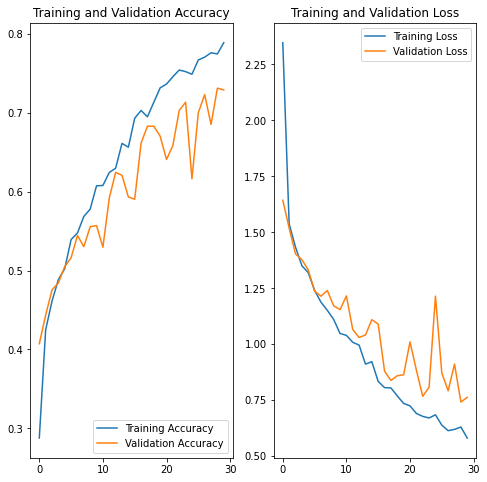

In [99]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



1.   **Overfitting issue resolved by data augmentation and dropouts.**
2.   **Accuracy is improved by adding 500 images for each class reducing class imbalance. Train accuracy : 78.6% Validation accuracy : 73%**
3.   **Reducing class imbalance helped model learnt features of each class with comparable weightage.**
4.   **Data augmentation helped model learnt different variations of classes thus not mugging up train data.**
